In [6]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

# Define path to your dataset folders
dataset_dir = "./"

# Create a list to store images and labels
images = []
labels = []

# Map class names to labels
class_names = {'banana': 0, 'watermelon': 1, 'orange': 2}

# Load images from each class folder
for class_name, label in class_names.items():
    class_dir = os.path.join(dataset_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        # Read image using OpenCV
        image = cv.imread(image_path)
        if image is None:
            print(f"Failed to load image: {image_path}")
            continue
        # Resize image to (32, 32)
        image = cv.resize(image, (32, 32))
        # Normalize pixel values
        image = image / 255.0
        # Append image and label to lists
        images.append(image)
        labels.append(label)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Define the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))  # 3 output classes: banana, watermelon, orange

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(images, labels, epochs=40, validation_split=0.2)

# Save the model
model.save('fruit_image_classifier_model')

Epoch 1/40
3/3 [==============================] - 1s 103ms/step - loss: 1.0753 - accuracy: 0.4795 - val_loss: 1.8276 - val_accuracy: 0.0000e+00
Epoch 2/40
3/3 [==============================] - 0s 25ms/step - loss: 1.0204 - accuracy: 0.4110 - val_loss: 1.6969 - val_accuracy: 0.0000e+00
Epoch 3/40
3/3 [==============================] - 0s 24ms/step - loss: 0.9909 - accuracy: 0.4110 - val_loss: 1.8214 - val_accuracy: 0.0000e+00
Epoch 4/40
3/3 [==============================] - 0s 24ms/step - loss: 0.9745 - accuracy: 0.5616 - val_loss: 1.7479 - val_accuracy: 0.0000e+00
Epoch 5/40
3/3 [==============================] - 0s 24ms/step - loss: 0.9345 - accuracy: 0.5753 - val_loss: 1.6844 - val_accuracy: 0.0000e+00
Epoch 6/40
3/3 [==============================] - 0s 24ms/step - loss: 0.8816 - accuracy: 0.6301 - val_loss: 1.9958 - val_accuracy: 0.0000e+00
Epoch 7/40
3/3 [==============================] - 0s 24ms/step - loss: 0.8184 - accuracy: 0.6849 - val_loss: 1.9060 - val_accuracy: 0.0000e+0

INFO:tensorflow:Assets written to: fruit_image_classifier_model\assets


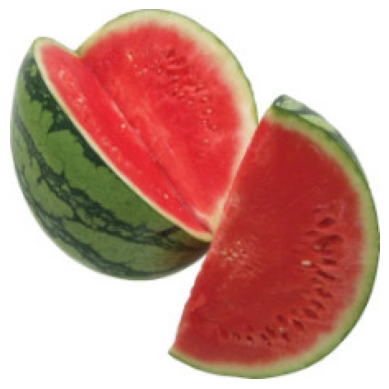

1/1 [==============================] - 0s 72ms/step
Predicted Class: watermelon
Probability: 0.996206521987915


In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models

# Load the trained model
model = models.load_model('fruit_image_classifier_model')

# Define the class names
class_names = ['banana', 'watermelon', 'orange']

# Function to preprocess the image
def preprocess_image(image_path):
    # Read the image
    img = cv.imread(image_path)
    # Resize the image to (32, 32)
    img = cv.resize(img, (32, 32))
    # Normalize pixel values
    img = img / 255.0
    return img

# Function to make a prediction
def predict_image(image_path):
    # Preprocess the image
    img = preprocess_image(image_path)
    # Make prediction
    prediction = model.predict(np.array([img]))
    # Get the predicted class index
    predicted_class_index = np.argmax(prediction)
    # Get the predicted class name
    predicted_class = class_names[predicted_class_index]
    # Get the probability of the predicted class
    probability = prediction[0][predicted_class_index]
    return predicted_class, probability

def display_image(image_path):
    # Read the image
    img = cv.imread(image_path)
    # Convert BGR to RGB
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Test the model with a sample image
sample_image_path = 'watermelons.jpg'
display_image(sample_image_path)
predicted_class, probability = predict_image(sample_image_path)
print(f"Predicted Class: {predicted_class}")
print(f"Probability: {probability}")

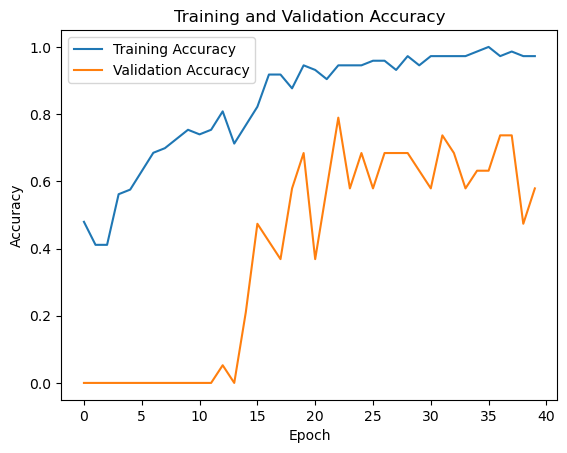

Validation Loss: 0.35955706238746643
Validation Accuracy: 0.9021739363670349
3/3 [==============================] - 0s 6ms/step
Precision: 0.9208099299632481
Recall: 0.9021739130434783
F1 Score: 0.8987409010426913
Confusion Matrix:
[[30  0  0]
 [ 0 32  0]
 [ 8  1 21]]
F1 Score: 0.8987409010426913


In [18]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix


# Get training history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot training and validation accuracy
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(images, labels, verbose=0)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Make predictions on the validation set
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Compute precision, recall, F1 score
precision, recall, f1, _ = precision_recall_fscore_support(labels, predicted_labels, average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Compute confusion matrix
conf_matrix = confusion_matrix(labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)
print(f"F1 Score: {f1}")